In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_pivot = pd.read_csv('df_pivot.csv')

df_abtest = pd.read_csv('df_abtest.csv')
df_pivot.head()

,client_id,Variation,clnt_tenure_yr,age_group,confirm,start,step_1,step_2,step_3,drop_start_step_1,drop_step_1_step_2,drop_step_2_step_3,drop_step_3_confirm,tenure_group
0,555,Test,3.0,25-34,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured
1,647,Test,12.0,55-64,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured
2,934,Test,9.0,45-54,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured
3,1028,Control,12.0,35-44,NaN,9.0,9.0,9.0,9.0,0.0,0.0,0.0,NaN,less-tenured
4,1104,Control,5.0,45-54,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured


In [33]:
df_pivot.shape

(50487, 14)

In [34]:
df_pivot.info()
df_pivot.describe()
df_pivot.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50487 entries, 0 to 50486
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            50487 non-null  int64  
 1   Variation            50487 non-null  object 
 2   clnt_tenure_yr       50487 non-null  float64
 3   age_group            50487 non-null  object 
 4   confirm              34110 non-null  float64
 5   start                50063 non-null  float64
 6   step_1               44406 non-null  float64
 7   step_2               40896 non-null  float64
 8   step_3               38292 non-null  float64
 9   drop_start_step_1    44270 non-null  float64
 10  drop_step_1_step_2   40864 non-null  float64
 11  drop_step_2_step_3   38179 non-null  float64
 12  drop_step_3_confirm  33763 non-null  float64
 13  tenure_group         50487 non-null  object 
dtypes: float64(10), int64(1), object(3)
memory usage: 5.4+ MB


client_id                  0
Variation                  0
clnt_tenure_yr             0
age_group                  0
confirm                16377
start                    424
step_1                  6081
step_2                  9591
step_3                 12195
drop_start_step_1       6217
drop_step_1_step_2      9623
drop_step_2_step_3     12308
drop_step_3_confirm    16724
tenure_group               0
dtype: int64

**1.- COMPLETION RATE**

In [35]:
# Fill missing confirm with 0 (not completed)
df_pivot['confirm_filled'] = df_pivot['confirm'].fillna(0)

# Completion rate by Variation
completion_rate = df_pivot.groupby('Variation')['confirm_filled'].apply(lambda x: (x>0).mean())
print("Completion Rate by Variation:")
print(completion_rate)

Completion Rate by Variation:
Variation
Control    0.655785
Test       0.692927
Name: confirm_filled, dtype: float64


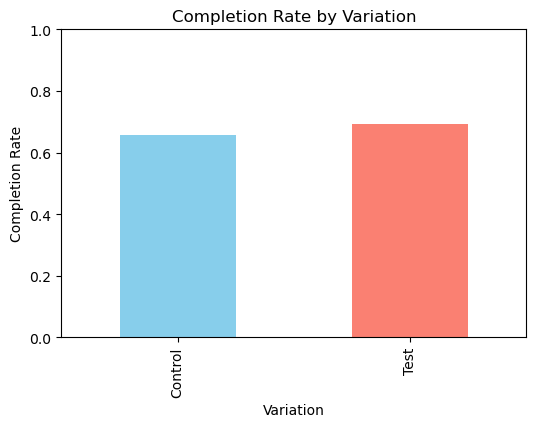

In [71]:
# Completion Rate by Variation
completion_rate.plot(kind='bar', color=['skyblue','salmon'], figsize=(6,4))
plt.ylim(0,1)
plt.ylabel("Completion Rate")
plt.title("Completion Rate by Variation")
plt.show()

Test variation shows slightly higher completion rate (69%) than Control (66%).

In [72]:
#Completion Rate by Age Group
completion_by_age = df_pivot.groupby(['Variation','age_group'])['confirm_filled'].apply(lambda x: (x>0).mean())
print("Completion Rate by Age Group:")
print(completion_by_age)



Completion Rate by Age Group:
Variation  age_group
Control    25-34        0.669919
           35-44        0.675240
           45-54        0.669850
           55-64        0.661274
           65+          0.586779
           <25          0.650513
Test       25-34        0.716211
           35-44        0.704167
           45-54        0.686157
           55-64        0.695784
           65+          0.639237
           <25          0.709046
Name: confirm_filled, dtype: float64


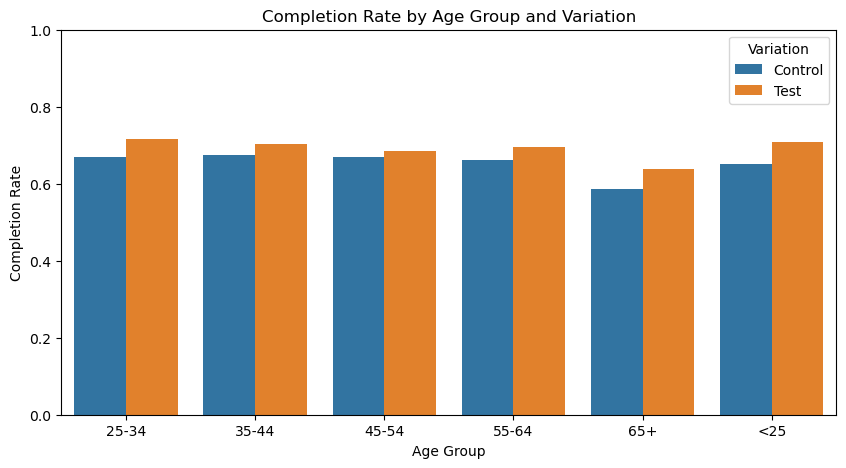

In [74]:
# Convert completion_by_age Series to DataFrame
df_age = completion_by_age.reset_index()
df_age.columns = ['Variation', 'Age Group', 'Completion Rate']

plt.figure(figsize=(10,5))
sns.barplot(data=df_age, x='Age Group', y='Completion Rate', hue='Variation')
plt.ylim(0,1)
plt.title("Completion Rate by Age Group and Variation")
plt.ylabel("Completion Rate")
plt.show()

In [73]:
#Completion Rate by Tenure Group
completion_by_tenure = df_pivot.groupby(['Variation','tenure_group'])['confirm_filled'].apply(lambda x: (x>0).mean())
print("Completion Rate by Tenure Group:")
print(completion_by_tenure)

Completion Rate by Tenure Group:
Variation  tenure_group
Control    less-tenured    0.652755
           more-tenured    0.658841
Test       less-tenured    0.696756
           more-tenured    0.689171
Name: confirm_filled, dtype: float64


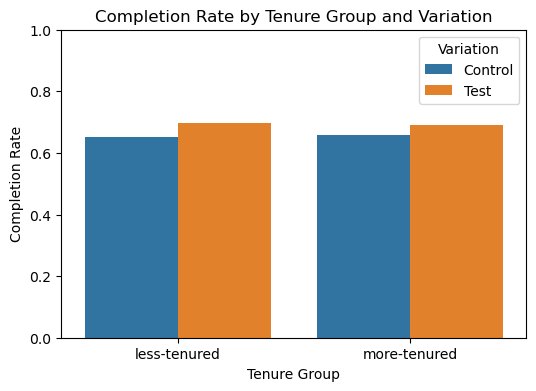

In [75]:
# Convert completion_by_tenure Series to DataFrame
df_tenure = completion_by_tenure.reset_index()
df_tenure.columns = ['Variation', 'Tenure Group', 'Completion Rate']

plt.figure(figsize=(6,4))
sns.barplot(data=df_tenure, x='Tenure Group', y='Completion Rate', hue='Variation')
plt.ylim(0,1)
plt.title("Completion Rate by Tenure Group and Variation")
plt.ylabel("Completion Rate")
plt.show()

📌 ***Summary of Completion Rate Results***

- Overall: Test variation shows a slightly higher completion rate (69%) than Control (66%).

- By Age:
    - Highest completion in Test is 25–34 (71%) and <25 (71%).
    - Lowest completion is 65+ for both variations (Control 59%, Test 64%).

- By Tenure:
    - Both less-tenured and more-tenured users have higher completion in Test.
    - Less-tenured: 70% (Test) vs 65% (Control)
    - More-tenured: 69% (Test) vs 66% (Control)

✅ Conclusion: The Test design slightly improves completion overall, particularly for younger users and less-tenured clients.

**Preparing the data for time spent per step & Error Rates**

In [37]:
# Pivot table: rows = client_id, columns = process_step, values = session_duration_sec
time_pivot = df_abtest.pivot_table(
    index='client_id', 
    columns='process_step', 
    values='session_duration_sec',
    aggfunc='sum'  # sum duration if multiple entries per step
).reset_index()

In [38]:
time_pivot

process_step,client_id,confirm,start,step_1,step_2,step_3
0,555,158.0,158.0,158.0,158.0,158.0
1,647,377.0,377.0,377.0,377.0,377.0
2,934,NaN,568.0,NaN,NaN,NaN
3,1028,NaN,538.0,2690.0,1076.0,538.0
4,1104,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
50495,9999150,NaN,36.0,18.0,NaN,NaN
50496,9999400,119.0,119.0,119.0,119.0,119.0
50497,9999626,NaN,8.0,8.0,NaN,NaN
50498,9999729,75.0,990.0,540.0,525.0,75.0


In [39]:
time_pivot = time_pivot.rename(columns={
    'start': 'time_start',
    'step_1': 'time_step_1',
    'step_2': 'time_step_2',
    'step_3': 'time_step_3',
    'confirm': 'time_confirm'
})

In [40]:
df_pivot = df_pivot.merge(time_pivot, on='client_id', how='left')


In [41]:
df_pivot

,client_id,Variation,clnt_tenure_yr,age_group,confirm,start,step_1,step_2,step_3,drop_start_step_1,drop_step_1_step_2,drop_step_2_step_3,drop_step_3_confirm,tenure_group,confirm_filled,time_confirm,time_start,time_step_1,time_step_2,time_step_3
0,555,Test,3.0,25-34,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured,5.0,158.0,158.0,158.0,158.0,158.0
1,647,Test,12.0,55-64,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured,5.0,377.0,377.0,377.0,377.0,377.0
2,934,Test,9.0,45-54,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured,0.0,NaN,568.0,NaN,NaN,NaN
3,1028,Control,12.0,35-44,NaN,9.0,9.0,9.0,9.0,0.0,0.0,0.0,NaN,less-tenured,0.0,NaN,538.0,2690.0,1076.0,538.0
4,1104,Control,5.0,45-54,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,Test,5.0,25-34,NaN,3.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,more-tenured,0.0,NaN,36.0,18.0,NaN,NaN
50483,9999400,Test,7.0,25-34,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,more-tenured,5.0,119.0,119.0,119.0,119.0,119.0
50484,9999626,Test,9.0,25-34,NaN,2.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,more-tenured,0.0,NaN,8.0,8.0,NaN,NaN
50485,9999729,Test,10.0,25-34,5.0,2.0,2.0,5.0,5.0,0.0,1.5,0.0,0.0,more-tenured,5.0,75.0,990.0,540.0,525.0,75.0


In [42]:
time_avg = df_pivot.groupby('Variation')[['time_start','time_step_1','time_step_2','time_step_3','time_confirm']].mean()
print("Average Time Spent per Step by Variation (seconds):")
print(time_avg)


Average Time Spent per Step by Variation (seconds):
            time_start  time_step_1  time_step_2  time_step_3  time_confirm
Variation                                                                  
Control     832.546920   660.953539   647.825091   625.482143    494.398691
Test       1042.881186   812.901195   735.727395   657.716325    645.539343


**2.- Define Error Columns**

In [43]:
df_pivot

,client_id,Variation,clnt_tenure_yr,age_group,confirm,start,step_1,step_2,step_3,drop_start_step_1,drop_step_1_step_2,drop_step_2_step_3,drop_step_3_confirm,tenure_group,confirm_filled,time_confirm,time_start,time_step_1,time_step_2,time_step_3
0,555,Test,3.0,25-34,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured,5.0,158.0,158.0,158.0,158.0,158.0
1,647,Test,12.0,55-64,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,less-tenured,5.0,377.0,377.0,377.0,377.0,377.0
2,934,Test,9.0,45-54,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured,0.0,NaN,568.0,NaN,NaN,NaN
3,1028,Control,12.0,35-44,NaN,9.0,9.0,9.0,9.0,0.0,0.0,0.0,NaN,less-tenured,0.0,NaN,538.0,2690.0,1076.0,538.0
4,1104,Control,5.0,45-54,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,less-tenured,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,Test,5.0,25-34,NaN,3.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,more-tenured,0.0,NaN,36.0,18.0,NaN,NaN
50483,9999400,Test,7.0,25-34,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,more-tenured,5.0,119.0,119.0,119.0,119.0,119.0
50484,9999626,Test,9.0,25-34,NaN,2.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,more-tenured,0.0,NaN,8.0,8.0,NaN,NaN
50485,9999729,Test,10.0,25-34,5.0,2.0,2.0,5.0,5.0,0.0,1.5,0.0,0.0,more-tenured,5.0,75.0,990.0,540.0,525.0,75.0


In [44]:
# 1️⃣ Recalculate drop-offs using raw steps

df_pivot['drop_start_step_1'] = df_pivot['step_1'] - df_pivot['start']
df_pivot['drop_step_1_step_2'] = df_pivot['step_2'] - df_pivot['step_1']
df_pivot['drop_step_2_step_3'] = df_pivot['step_3'] - df_pivot['step_2']
df_pivot['drop_step_3_confirm'] = df_pivot['confirm'] - df_pivot['step_3']


In [45]:
# 2️⃣ Define errors: negative drop-offs indicate backward movement or irregularity

df_pivot['error_start_step_1'] = df_pivot['drop_start_step_1'].apply(lambda x: 1 if x < 0 else 0)
df_pivot['error_step_1_step_2'] = df_pivot['drop_step_1_step_2'].apply(lambda x: 1 if x < 0 else 0)
df_pivot['error_step_2_step_3'] = df_pivot['drop_step_2_step_3'].apply(lambda x: 1 if x < 0 else 0)
df_pivot['error_step_3_confirm'] = df_pivot['drop_step_3_confirm'].apply(lambda x: 1 if x < 0 else 0)

In [46]:
# 3️⃣ Calculate error rates by Variation
error_rates = df_pivot.groupby('Variation')[
    ['error_start_step_1','error_step_1_step_2','error_step_2_step_3','error_step_3_confirm']
].mean()

print("Error Rates by Variation:")
print(error_rates)

Error Rates by Variation:
           error_start_step_1  error_step_1_step_2  error_step_2_step_3  \
Variation                                                                 
Control              0.002508             0.001445             0.006036   
Test                 0.001372             0.002485             0.008939   

           error_step_3_confirm  
Variation                        
Control                0.016917  
Test                   0.048403  


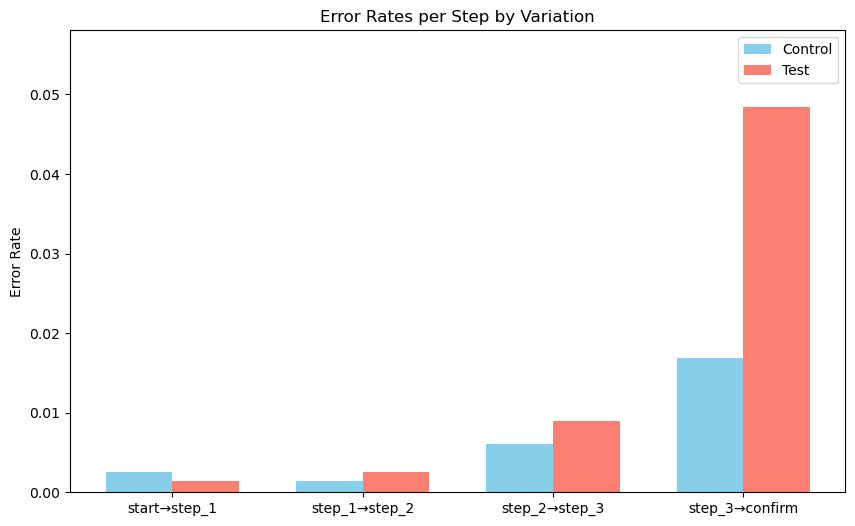

In [48]:
# Prepare data
steps = ['start→step_1', 'step_1→step_2', 'step_2→step_3', 'step_3→confirm']
control_errors = error_rates.loc['Control'].values
test_errors = error_rates.loc['Test'].values

x = range(len(steps))
width = 0.35  # bar width

# Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar([p - width/2 for p in x], control_errors, width=width, label='Control', color='skyblue')
ax.bar([p + width/2 for p in x], test_errors, width=width, label='Test', color='salmon')

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.set_ylabel('Error Rate')
ax.set_title('Error Rates per Step by Variation')
ax.legend()
plt.ylim(0, max(max(control_errors), max(test_errors)) * 1.2)  # add some headroom

# Show
plt.show()

✅ **Interpretation:**

- Overall, backward movements are rare, which is good.
- The Test group has a slightly higher error at the final step, which might be worth investigating.

- Step 3 → Confirm has the **highest error rate**, especially in Test (~4.8%), which could indicate some confusion or rework at the final confirmation step.

***Error Rates by Age Group and Variation***:

In [52]:
# By Age Group
error_by_age = df_pivot.groupby(['Variation','age_group'])[
    ['error_start_step_1','error_step_1_step_2','error_step_2_step_3','error_step_3_confirm']
].mean()
print("Error Rates by Age Group:")
print(error_by_age)


Error Rates by Age Group:
                     error_start_step_1  error_step_1_step_2  \
Variation age_group                                            
Control   25-34                0.001661             0.001453   
          35-44                0.003530             0.001261   
          45-54                0.002171             0.000651   
          55-64                0.002762             0.001578   
          65+                  0.003320             0.002113   
          <25                  0.001140             0.002281   
Test      25-34                0.000700             0.001225   
          35-44                0.001535             0.003289   
          45-54                0.002055             0.001494   
          55-64                0.001423             0.003558   
          65+                  0.001362             0.003815   
          <25                  0.000978             0.001467   

                     error_step_2_step_3  error_step_3_confirm  
Variation ag

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_29122/4018967164.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_by_age = df_pivot.groupby(['Variation', 'age_group']).apply(


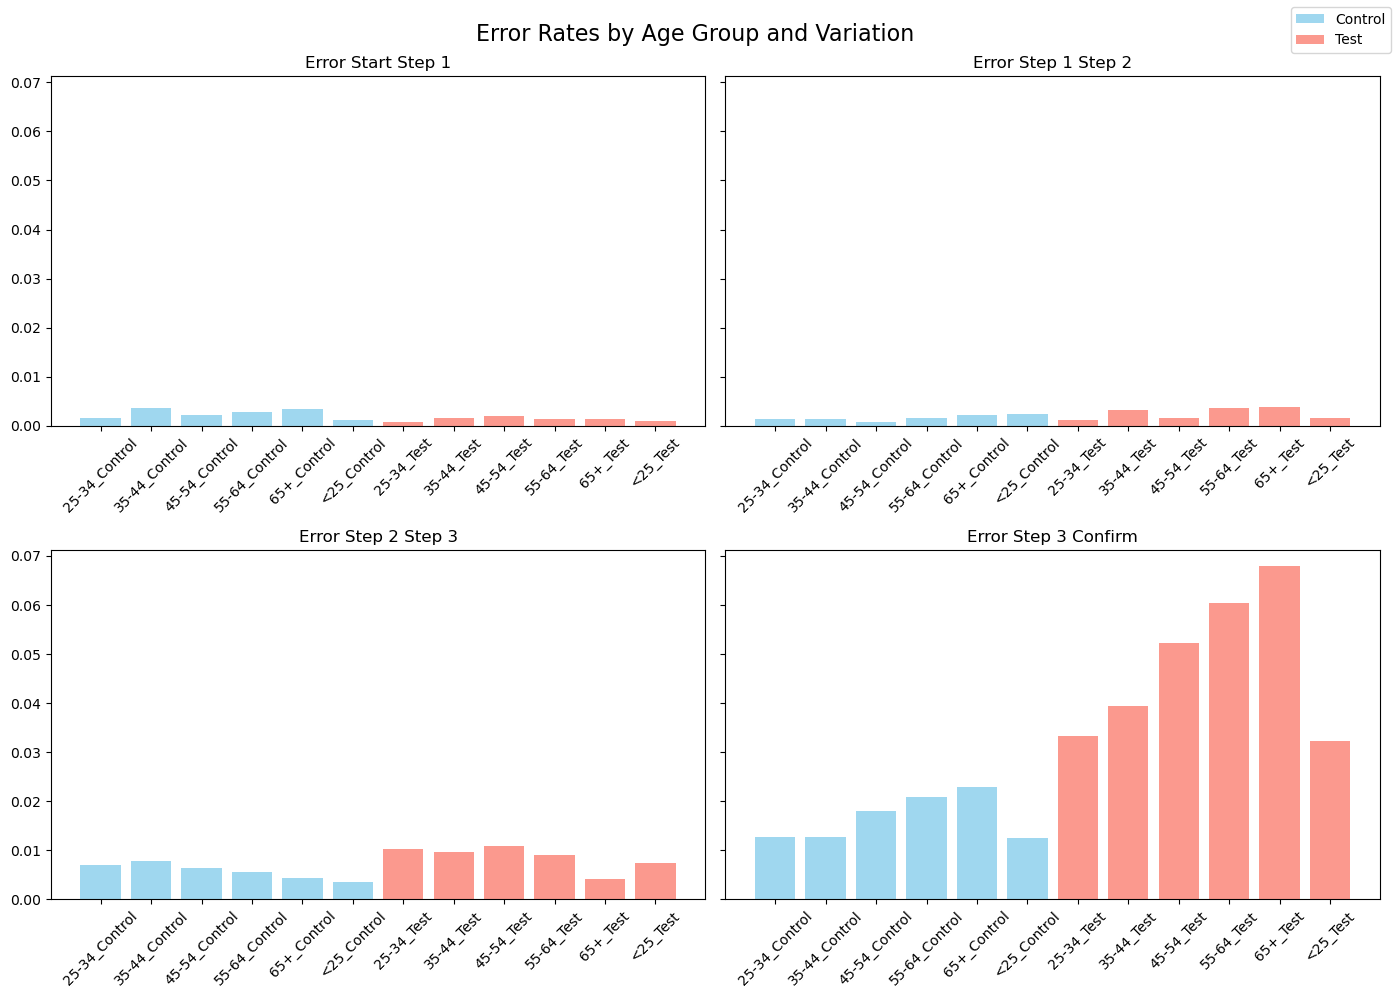

In [50]:
# Group by Variation and Age Group
error_by_age = df_pivot.groupby(['Variation', 'age_group']).apply(
    lambda g: pd.Series({
        'error_start_step_1': (g['start'] > g['step_1']).mean(),
        'error_step_1_step_2': (g['step_1'] > g['step_2']).mean(),
        'error_step_2_step_3': (g['step_2'] > g['step_3']).mean(),
        'error_step_3_confirm': (g['step_3'] > g['confirm']).mean()
    })
).reset_index()

# Plot
steps = ['error_start_step_1', 'error_step_1_step_2', 'error_step_2_step_3', 'error_step_3_confirm']

fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=True)
axes = axes.flatten()

for i, step in enumerate(steps):
    for variation, color in zip(['Control', 'Test'], ['skyblue', 'salmon']):
        subset = error_by_age[error_by_age['Variation'] == variation]
        axes[i].bar(subset['age_group'] + "_" + variation, subset[step], 
                    label=variation if i == 0 else "", color=color, alpha=0.8)
    axes[i].set_title(f"{step.replace('_',' ').title()}")
    axes[i].tick_params(axis='x', rotation=45)

fig.suptitle("Error Rates by Age Group and Variation", fontsize=16)
fig.legend(loc="upper right")
plt.tight_layout()
plt.show()

🔹 **Conclusions – Error Rates by Age Group**

**1.- Younger users (<25 and 25–34)**:
- In both Control and Test, they show the lowest error rates across steps.
- Especially in the Test group, <25 has much lower errors than older groups, even at the confirm step.
- Suggests that younger users adapt more easily to the process.

**2.- Middle-aged groups (35–54)**:
- Errors gradually increase compared to younger users, especially from step 2 → step 3 and step 3 → confirm.
- In the Test group, the 45–54 segment shows a notably high confirm error rate (over 5%).

**3.- Older users (55–64 and 65+)**:
- They consistently show the highest error rates, particularly in the Test variation.
- For example, 65+ Test group has almost 7% confirm-step errors, compared to ~2% in Control.
- This indicates older clients struggled more with the new process.

**Key takeaway**:
The Test variation disproportionately increases error rates among older age groups.

***Error Rates by Tenure Group and Variation***:

In [53]:
# By Tenure Group
error_by_tenure = df_pivot.groupby(['Variation','tenure_group'])[
    ['error_start_step_1','error_step_1_step_2','error_step_2_step_3','error_step_3_confirm']
].mean()
print("Error Rates by Tenure Group:")
print(error_by_tenure)


Error Rates by Tenure Group:
                        error_start_step_1  error_step_1_step_2  \
Variation tenure_group                                            
Control   less-tenured            0.002032             0.001693   
          more-tenured            0.002988             0.001195   
Test      less-tenured            0.001348             0.002547   
          more-tenured            0.001396             0.002424   

                        error_step_2_step_3  error_step_3_confirm  
Variation tenure_group                                             
Control   less-tenured             0.006010              0.017354  
          more-tenured             0.006062              0.016477  
Test      less-tenured             0.008390              0.050865  
          more-tenured             0.009477              0.045989  


/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_29122/1649061617.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_by_tenure = df_pivot.groupby(['Variation', 'tenure_group']).apply(


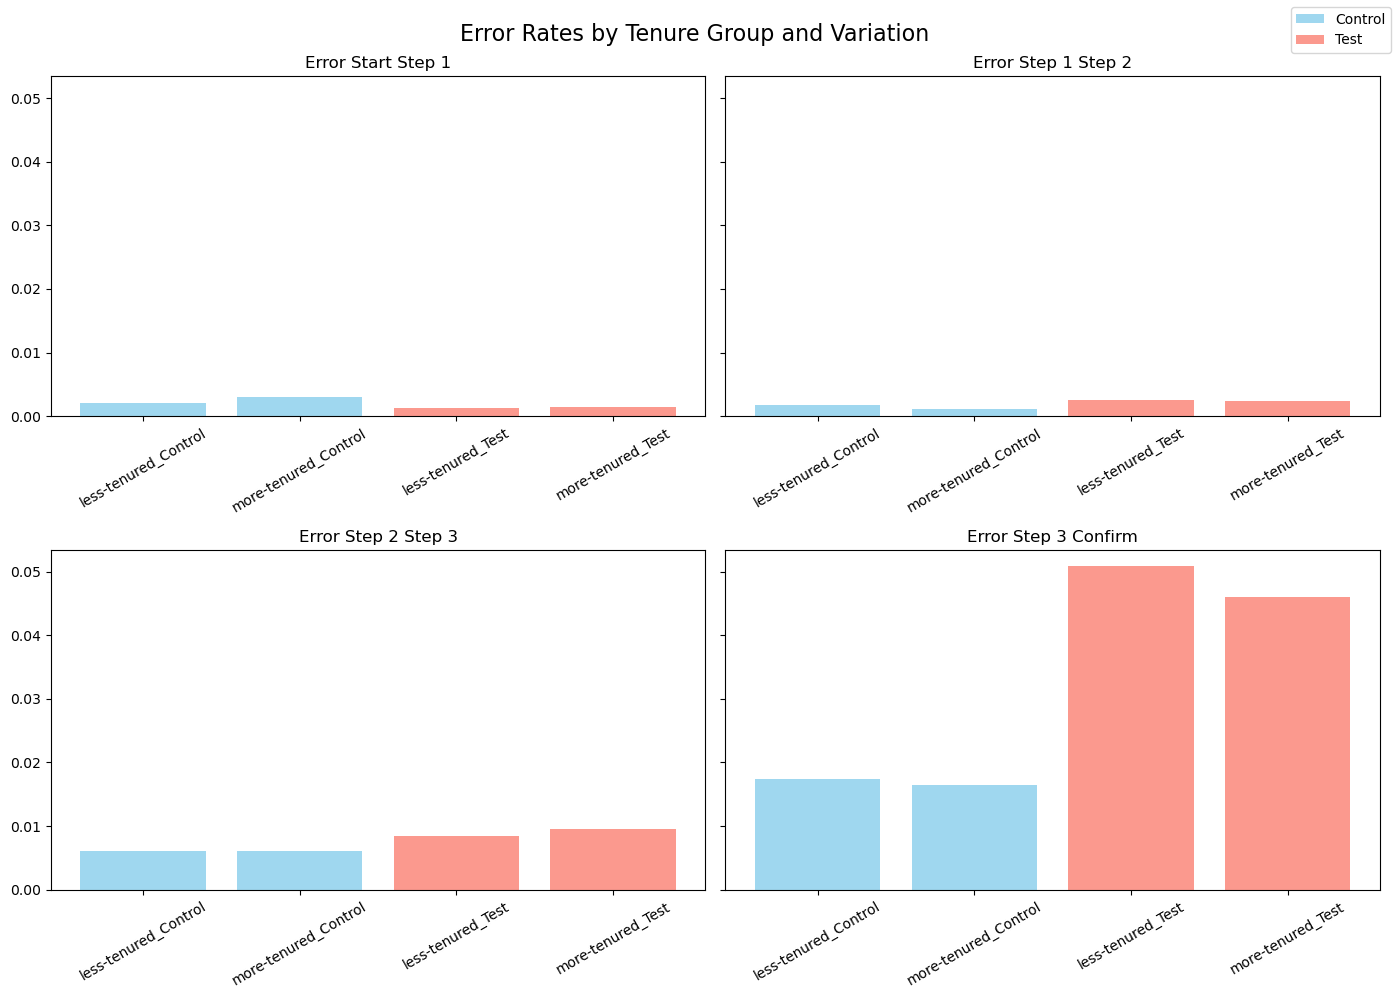

In [51]:
# Group by Variation and Tenure Group
error_by_tenure = df_pivot.groupby(['Variation', 'tenure_group']).apply(
    lambda g: pd.Series({
        'error_start_step_1': (g['start'] > g['step_1']).mean(),
        'error_step_1_step_2': (g['step_1'] > g['step_2']).mean(),
        'error_step_2_step_3': (g['step_2'] > g['step_3']).mean(),
        'error_step_3_confirm': (g['step_3'] > g['confirm']).mean()
    })
).reset_index()

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharey=True)
axes = axes.flatten()

for i, step in enumerate(steps):
    for variation, color in zip(['Control', 'Test'], ['skyblue', 'salmon']):
        subset = error_by_tenure[error_by_tenure['Variation'] == variation]
        axes[i].bar(subset['tenure_group'] + "_" + variation, subset[step], 
                    label=variation if i == 0 else "", color=color, alpha=0.8)
    axes[i].set_title(f"{step.replace('_',' ').title()}")
    axes[i].tick_params(axis='x', rotation=30)

fig.suptitle("Error Rates by Tenure Group and Variation", fontsize=16)
fig.legend(loc="upper right")
plt.tight_layout()
plt.show()


**🔹 Conclusions – Error Rates by Tenure Group**

**Less-tenured users**:
- Errors are lower in Control but much higher in Test, especially in the confirm step (5% vs 1.7%).
- Suggests new clients find the Test process confusing at the final step.

**More-tenured users**:
- Control and Test are closer in early steps, but in the confirm step, Test again has much higher errors (4.6% vs 1.6%).
- Indicates even experienced users face challenges with the new process.

**Key takeaway**:

Both new and long-standing clients are negatively impacted by the Test variation, with the largest gap appearing at the confirm step.

**3.- Analyze time spent per step (efficiency KPI)**

In [57]:
df_abtest.columns

Index(['client_id', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts_x', 'bal_x', 'calls_6_mnth_x',
       'logons_6_mnth_x', 'visitor_id', 'visit_id', 'process_step',
       'date_time', 'source', 'num_steps', 'session_duration_sec',
       'num_accts_y', 'bal_y', 'calls_6_mnth_y', 'logons_6_mnth_y',
       'num_sessions'],
      dtype='object')

In [58]:
#We calculate the average time spent per step, split by Variation (Control vs Test)
time_by_step = (
    df_abtest
    .groupby(["Variation", "process_step"])["session_duration_sec"]
    .agg(["mean", "median", "count"])
    .reset_index()
)

time_by_step

,Variation,process_step,mean,median,count
0,Control,confirm,440.139017,282.0,17336
1,Control,start,429.314720,216.0,45380
2,Control,step_1,450.856891,265.0,29544
3,Control,step_2,468.784891,293.0,25773
4,Control,step_3,484.236813,305.0,22503
5,Test,confirm,471.148164,238.0,25600
6,Test,start,498.812346,256.0,55773
7,Test,step_1,510.136890,280.0,38666
8,Test,step_2,529.908055,293.0,30899
9,Test,step_3,533.063196,294.0,25761


In [59]:
#Make a pivot table so we can see Control vs Test side by side
time_pivot = time_by_step.pivot(
    index="process_step",
    columns="Variation",
    values="mean"
)

time_pivot

Variation,Control,Test
process_step,,
confirm,440.139017,471.148164
start,429.314720,498.812346
step_1,450.856891,510.136890
step_2,468.784891,529.908055
step_3,484.236813,533.063196


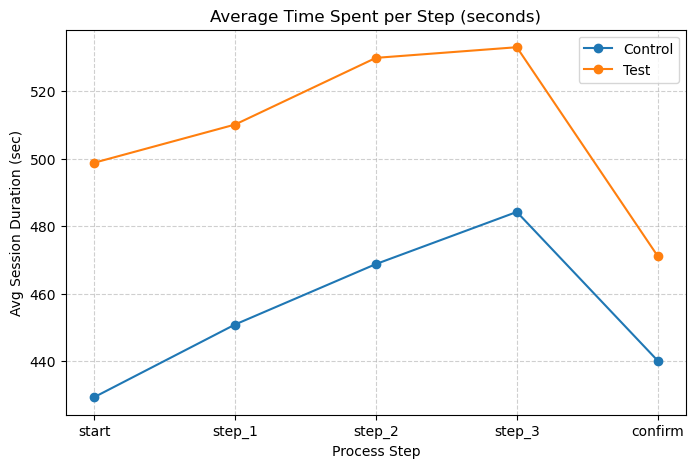

In [76]:
#Visualization
# Define the correct order of process steps
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Ensure 'process_step' is categorical with the defined order
time_by_step['process_step'] = pd.Categorical(time_by_step['process_step'], 
                                              categories=step_order, 
                                              ordered=True)

# Sort the DataFrame by the ordered steps
time_by_step = time_by_step.sort_values('process_step')

# Visualization
plt.figure(figsize=(8,5))
for variation in time_by_step["Variation"].unique():
    subset = time_by_step[time_by_step["Variation"] == variation]
    plt.plot(subset["process_step"], subset["mean"], marker="o", label=variation)

plt.title("Average Time Spent per Step (seconds)")
plt.xlabel("Process Step")
plt.ylabel("Avg Session Duration (sec)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

It looks like users in the Test design spend more time on every step compared to Control (start through confirm).

**Break it down by Age Group**

In [63]:
# Keep only unique client_id → age_group / tenure_group mapping
demo_info = df_pivot.reset_index()[["client_id", "age_group", "tenure_group"]].drop_duplicates()

# Merge demographics into df_abtest
df_abtest_enriched = df_abtest.merge(demo_info, on="client_id", how="left")

In [64]:
# By age group
time_by_age = (
    df_abtest_enriched
    .groupby(["Variation", "age_group", "process_step"])["session_duration_sec"]
    .mean()
    .reset_index()
)

time_by_age

,Variation,age_group,process_step,session_duration_sec
0,Control,25-34,confirm,352.942790
1,Control,25-34,start,345.069828
2,Control,25-34,step_1,369.193246
3,Control,25-34,step_2,369.540201
4,Control,25-34,step_3,380.357046
5,Control,35-44,confirm,405.357588
6,Control,35-44,start,373.698444
7,Control,35-44,step_1,396.126451
8,Control,35-44,step_2,408.345074
9,Control,35-44,step_3,410.171492


In [65]:
time_age_pivot = time_by_age.pivot_table(
    index=["age_group", "process_step"],
    columns="Variation",
    values="session_duration_sec"
)
time_age_pivot

Variation                  Control        Test
age_group process_step                        
25-34     confirm       352.942790  397.683786
          start         345.069828  387.032748
          step_1        369.193246  388.097037
          step_2        369.540201  403.829307
          step_3        380.357046  376.349378
35-44     confirm       405.357588  422.479514
          start         373.698444  423.591675
          step_1        396.126451  408.680731
          step_2        408.345074  421.242700
          step_3        410.171492  419.765059
45-54     confirm       458.196449  463.259007
          start         500.008793  517.097390
          step_1        512.652867  522.104078
          step_2        512.893901  563.468670
          step_3        511.520579  547.764928
55-64     confirm       497.908833  534.273053
          start         476.163579  592.480281
          step_1        505.000000  611.699519
          step_2        536.262422  614.081351
          step_3        555.689763  628.049851
65+       confirm       543.168804  504.221028
          start         475.771829  577.325557
          step_1        506.368319  633.966085
          step_2        572.160126  659.756118
          step_3        616.189346  715.451411
<25       confirm       328.406531  545.988011
          start         310.090346  404.081529
          step_1        329.390865  406.547823
          step_2        359.245351  427.835407
          step_3        368.212791  420.805217

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_29122/3514044177.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


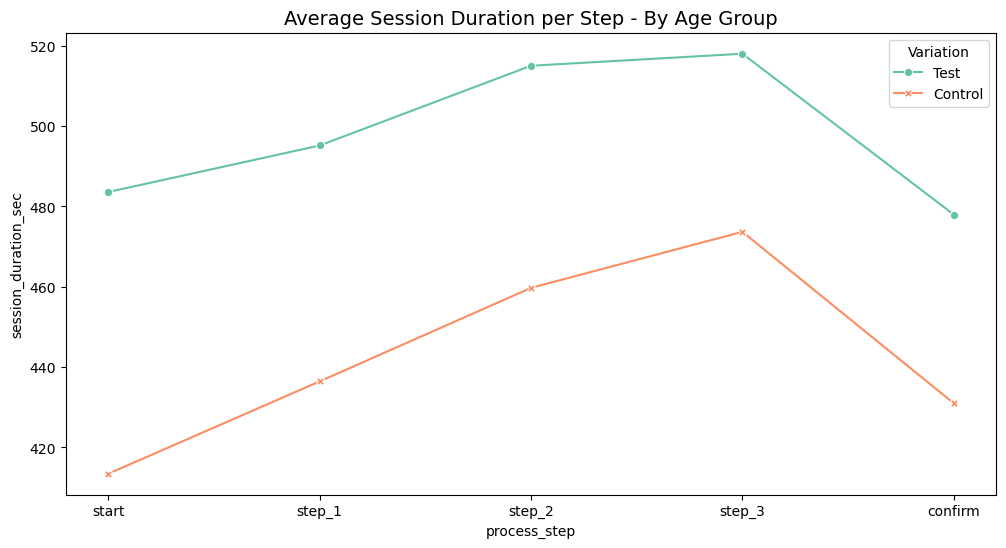

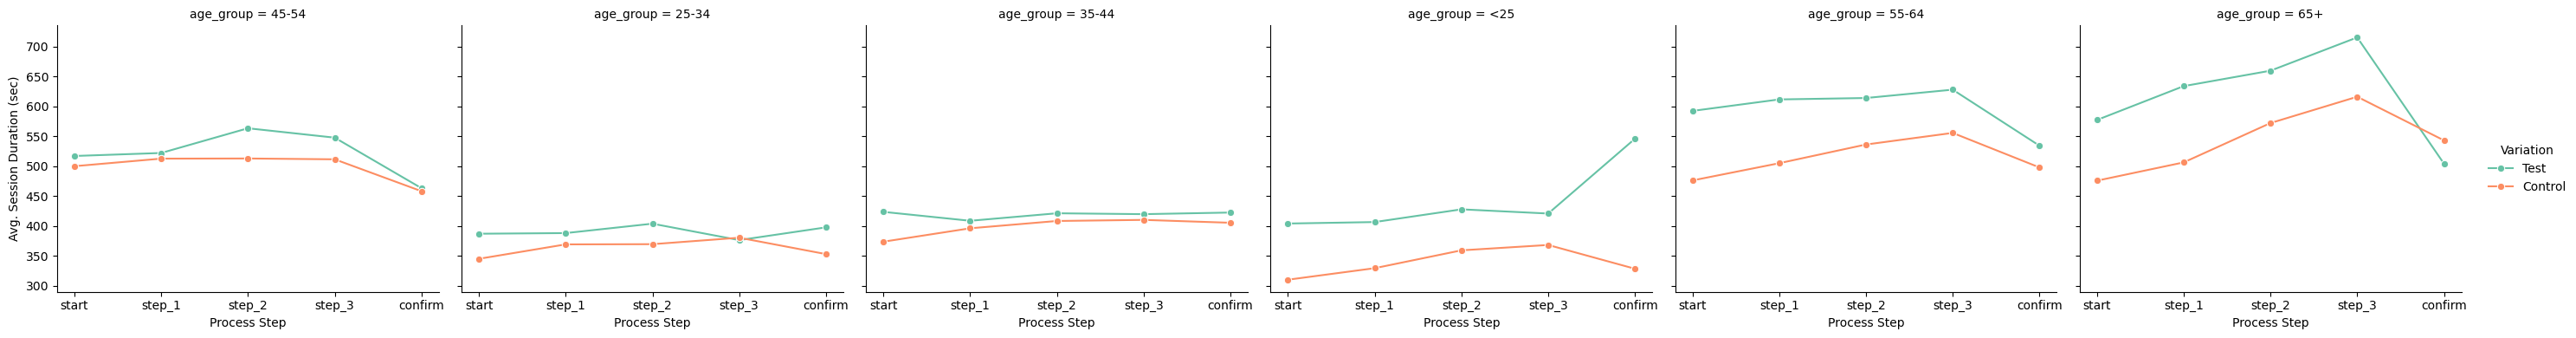

In [77]:
#Visualization
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Make 'process_step' categorical with the defined order
time_by_age['process_step'] = pd.Categorical(time_by_age['process_step'],
                                             categories=step_order,
                                             ordered=True)

# Sort the DataFrame by process_step
time_by_age = time_by_age.sort_values('process_step')

# Lineplot for all age groups combined
plt.figure(figsize=(12,6))
sns.lineplot(
    data=time_by_age,
    x="process_step",
    y="session_duration_sec",
    hue="Variation",
    style="Variation",
    markers=True,
    dashes=False,
    palette="Set2",
    errorbar=None,
    ci=None
).set_title("Average Session Duration per Step - By Age Group", fontsize=14)

# Facet by age group
g = sns.FacetGrid(time_by_age, col="age_group", hue="Variation", height=4, aspect=1.2, palette="Set2")
g.map(sns.lineplot, "process_step", "session_duration_sec", marker="o")
g.add_legend()
g.set_axis_labels("Process Step", "Avg. Session Duration (sec)")
plt.show()

📊 **Age Groups**

**<25 & 65+** → They spend much more time on almost every step of the test, showing greater difficulty with the new design.

**25–44** → Moderate differences: the test is somewhat slower, but without major gaps.

**45–64** → Clearly slower on the test, especially on intermediate steps (step_2 and step_3).

**Break it down by Tenure Group**

In [68]:
# By tenure group
time_by_tenure = (
    df_abtest_enriched
    .groupby(["Variation", "tenure_group", "process_step"])["session_duration_sec"]
    .mean()
    .reset_index()
)

time_by_tenure

,Variation,tenure_group,process_step,session_duration_sec
0,Control,less-tenured,confirm,444.985709
1,Control,less-tenured,start,436.795421
2,Control,less-tenured,step_1,458.255072
3,Control,less-tenured,step_2,478.723744
4,Control,less-tenured,step_3,496.774695
5,Control,more-tenured,confirm,435.403692
6,Control,more-tenured,start,421.695439
7,Control,more-tenured,step_1,443.465175
8,Control,more-tenured,step_2,458.866004
9,Control,more-tenured,step_3,471.743599


In [69]:
time_tenure_pivot = time_by_tenure.pivot_table(
    index=["tenure_group", "process_step"],
    columns="Variation",
    values="session_duration_sec"
)

time_tenure_pivot

Variation                     Control        Test
tenure_group process_step                        
less-tenured confirm       444.985709  464.375862
             start         436.795421  497.678619
             step_1        458.255072  518.330746
             step_2        478.723744  523.727314
             step_3        496.774695  542.075006
more-tenured confirm       435.403692  477.990494
             start         421.695439  500.120323
             step_1        443.465175  502.241378
             step_2        458.866004  536.202732
             step_3        471.743599  524.216863

<Figure size 1000x500 with 0 Axes>

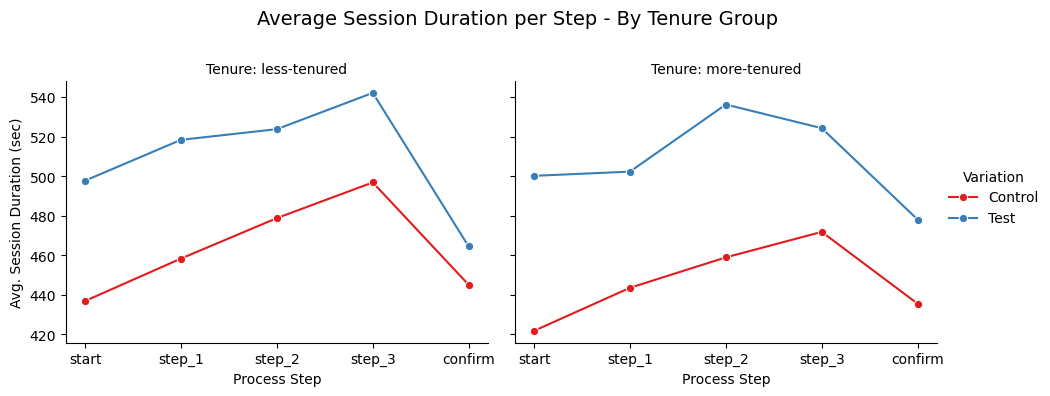

In [78]:
#Visualization
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Make 'process_step' categorical with the defined order
time_by_tenure['process_step'] = pd.Categorical(time_by_tenure['process_step'],
                                                categories=step_order,
                                                ordered=True)

# Sort the DataFrame by process_step
time_by_tenure = time_by_tenure.sort_values('process_step')

# FacetGrid plot by tenure group
plt.figure(figsize=(10,5))
g2 = sns.FacetGrid(time_by_tenure, col="tenure_group", hue="Variation", height=4, aspect=1.2, palette="Set1")
g2.map(sns.lineplot, "process_step", "session_duration_sec", marker="o")
g2.add_legend()
g2.set_axis_labels("Process Step", "Avg. Session Duration (sec)")
g2.set_titles(col_template="Tenure: {col_name}")
plt.subplots_adjust(top=0.8)
g2.fig.suptitle("Average Session Duration per Step - By Tenure Group", fontsize=14)
plt.show()

📊 **Tenure Groups**

Both less and more tenured users spend more time on the **Test**.
The impact is even greater on more tenured users, who seem frustrated with the changes compared to the previous design.

👉 ***Conclusion***: The Test does not improve efficiency; in fact, it lengthens times in almost all segments, especially among young, older and more experienced users.

**FINAL CONCLUSIONS:**

- **Completion Rate**: Test design shows a slightly higher overall completion compared to Control.

- **Time Spent per Step**: Users spend more time in Test across almost all age and tenure groups; biggest increases among <25, 55+, 65+, and long-tenured users.

- **Error Rates**: Higher in Test, especially at the final confirm step, indicating possible confusion or difficulty.

- **Overall Conclusion**: Test design slightly improves completion but reduces efficiency and increases errors in key user segments.


In [79]:
# Save the DataFrame as a CSV
df_pivot.to_csv("df_pivot_2.csv", index=False)